## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
conversion_proportion = df.query("converted == 1").user_id.nunique() / df.user_id.nunique() 
conversion_proportion

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
test = df.query("(landing_page == 'new_page' and group != 'treatment') or (landing_page != 'new_page' and group == 'treatment')")
test.user_id.nunique()

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# remove the rows from the dataset  where treatment is not aligned with new_page or control is not aligned with old_page
test.index

df2 = df.drop(df.query("(landing_page == 'new_page' and group != 'treatment') or (landing_page != 'new_page' and group == 'treatment')").index)
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2[df2['user_id'].duplicated()]['user_id']


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [11]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2 = df2.drop(df2[(df2['user_id']==773192) & (df2['timestamp']== '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
converted_users = df2.query("converted == 1").user_id.nunique()
prob = converted_users / df2.shape[0]
print("probability of an individual converting regardless of the page they receive is :" , prob)

probability of an individual converting regardless of the page they receive is : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df_control = df2.query("group == 'control'")
converted_users = df_control.query("converted == 1").user_id.nunique()
prob_control = converted_users / df_control.shape[0]
print("probability of an individual converting Given that an individual was in the control group is :" , prob_control)

probability of an individual converting Given that an individual was in the control group is : 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df_treat = df2.query("group == 'treatment'")
converted_users = df_treat.query("converted == 1").user_id.nunique()
prob_treat = converted_users / df_treat.shape[0]
print("probability of an individual converting Given that an individual was in the treatment group is :" , prob_treat)

probability of an individual converting Given that an individual was in the treatment group is : 0.11880806551510564


d. What is the probability that an individual received the new page?

In [16]:
new_page = df2.query("landing_page == 'new_page'").user_id.nunique()
prob = new_page / df2.shape[0]
print("probability that an individual received the new page is :" , prob)

probability that an individual received the new page is : 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

As we can see from the above results, probabilty of a user getting converted in the control group is quite simialr to the 
probabilty of  getting converted  for the user who belongs to experiment group. Also, the overall probabilty of users getting converted irrespective of the page they were shown lies in the same range. Hence, there is no sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null hypothesis : H0 --> Pnew <= Pold 


Alternative hypothesis : H1 -->   Pnew > Pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
converted_users = df2.query("converted == 1").user_id.nunique()
p_new = converted_users / df2.shape[0]
print("Convert rate for Pnew  is :" , p_new)

Convert rate for Pnew  is : 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
converted_users = df2.query("converted == 1").user_id.nunique()
p_old = converted_users / df2.shape[0]
print("Convert rate for Pold  is :" , p_old)

Convert rate for Pold  is : 0.11959708724499628


c. What is $n_{new}$?

In [48]:
n_new = df2.query("landing_page=='new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [49]:
n_old = df2.query("landing_page=='old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [51]:
new_page_converted = np.random.choice([0,1], size = n_new, replace = True , p=[1-p_new , p_new])
new_page_converted.shape[0]

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [53]:
old_page_converted = np.random.choice([0,1], size = n_old, replace = True , p=[1-p_old , p_old])
old_page_converted.shape[0]

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [54]:
new_page_converted.mean()-old_page_converted.mean()

-0.0015162035243392047

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [55]:
p_diffs = [] 
size = df2.shape[0]
for i in range(10000):
    old_page_converted_1 = np.random.choice([0,1], size = n_old, replace = True , p=[1-p_old , p_old])
    new_page_converted_1 = np.random.choice([0,1], size = n_new, replace = True , p=[1-p_new , p_new])
    p_diffs.append(new_page_converted_1.mean() - old_page_converted_1.mean())
    

In [56]:
print(np.array(p_diffs).mean())
print(np.array(p_diffs).std())

-2.933292444325808e-06
0.0012026247066067434


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  10.,   80.,  421., 1433., 2716., 2794., 1767.,  609.,  154.,
          16.]),
 array([-0.00469584, -0.00378116, -0.00286647, -0.00195179, -0.00103711,
        -0.00012243,  0.00079225,  0.00170693,  0.00262162,  0.0035363 ,
         0.00445098]),
 <a list of 10 Patch objects>)

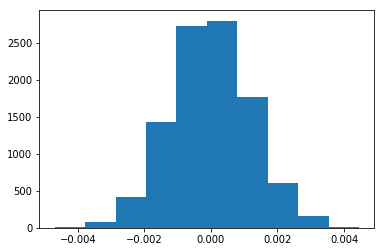

In [57]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.909

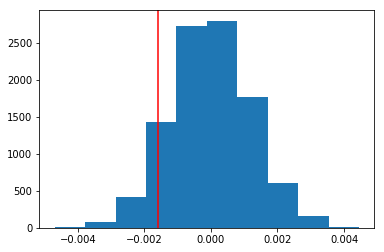

In [58]:
obs_diff = prob_treat - prob_control
plt.hist(p_diffs)
p_diffs = np.array(p_diffs)
plt.axvline(x = obs_diff , color= 'red')
(p_diffs > obs_diff).mean()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

In part j , we have calculated a p-value which gives the probability of getting an observed statistic given that the null hypothesis is true/ finding an extreme which will push us towards alternative hypothesis. 
Here, p-value obtained is 0.909 which is greater than the Type I error rate ( alpha = 0.05) which indicates that there is a large probability of finding an observed statistic from null hypothesis and we should not move away from it. 

Hence, we fail to reject the null hypothesis. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [59]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and landing_page == 'old_page'").shape[0]
print(convert_old)
convert_new = df2.query("converted == 1 and landing_page == 'new_page'").shape[0]
print(convert_new)
n_old = df2.query("landing_page == 'old_page'").shape[0]
print(n_old)
n_new = df2.query("landing_page == 'new_page'").shape[0]
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
print(convert_old/n_old)
print(convert_new/n_new)
stat , p_val = sm.stats.proportions_ztest([convert_old,convert_new],[n_old, n_new], alternative='smaller')
stat , p_val

0.1203863045004612
0.11880806551510564


(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

1. value of z-score tells us how many standard deviations away the element is from the mean. Here, z=1.31 indicates that out statistic is in between 1st and 2nd std deviation away from mean.
2. also p value = 0.9 whic is in range of the p-value obtained in the above section. This p-value is > 0.05 indicating that we still fail to reject the null hypothesis. Hence, these values agree with the above findings. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic regression as there are only 2 possible target outcomes 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [61]:
df2['intercept'] = 1
df2.head()
df2[['new_page' , 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()
# drop the old page column in regression model 
df2['ad_page'] = df2['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ad_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [62]:
lm = sm.Logit(df2['converted'] , df2[['intercept' ,'ad_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        12:44:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ad_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

1. P value associated with ab_page variable is 0.19 by the regression method ( which indicates that ab_page is not       
   statistcially significant to predict if the user converted or not ) and P value obtained in the part II was ~0.9. 
2. For my regression model, i considered the null hypothesis as there is not any relationship between my independent variable      (ab_page) and dependent variable (converted) . And I considered alternative hypothesis as 'there exists some relation     
   between my dependent and independent variable. 
3. For Part II , I considerd the null hypothesis as 'the probability of a user getting converted after landing on new page was    less than or equal to the probability of the user getting converted after landing on old page ' and alternative hypothesis 
   was 'the probability of a user getting converted after landing on new page is greater than the probability of 
   the user getting converted after landing on old page '
4. The reason behinf different p-values is that, for part II, I performed a two tailed test which checked for the probability 
   of finding an observed statistic in positivwe as well as negative direction. but, regression test just executed this in one    direction because it's a single tailed test. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

1. Till now, we have discussed the idea of user conversion only based upon the page they were shown. But, it would be a good  
   idea to consider other factors as well. Such as , the time period when the user was shown the page ( during a weekday,   
   weekend /holiday). We should also take into account the time period the experiment was run. It just gives an extra edge        toward making the corrcet decision as we can think of avoidiing change aversion/ novelty effects if required. 
2. If we have to add any additional factors to our regression model, possible disadvantages could be added multicollinearity   
   across independent varibles which increases the variance of the coefficient estimates

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [64]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ad_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [65]:
### Create the necessary dummy variables
df_new[['CA', 'UK' , 'US']] = pd.get_dummies(df_new['country'])
df_new.head()
df_new['intercept'] = 1
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ad_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [66]:
lm = sm.Logit(df_new['converted'] , df_new[['intercept' ,'CA' , 'UK']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [67]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        12:46:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [68]:
1/np.exp(-0.0408) 

1.0416437559600236

### Results for the above regression : 

1. For country variable, I have used US as the baseline and have calculated coefficients for CA and UK. From the above result,    we can see that, users in CA have 1.04 times less conversion rate as compared to users in US. Also, Users in UK have ~1% more     
   conversion rate as compared to users in US. 
2. P-value for CA and UK are 0.129 and 0.456 ( > than 0.05) resp. which indicates that the country variable is not  
   statistically significant in predicting conversion rate. 
3. Also, this is a very snmall change among countries in odrer to launch a whole new webpage. Hence, it seems practicallty insignificant
   


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
### Fit Your Linear Model And Obtain the Results
df_new[['new_page' , 'old_page']]= pd.get_dummies(df_new['landing_page'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ad_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [70]:
lm = sm.Logit(df_new['converted'] , df_new[['intercept' ,'CA' , 'UK' , 'new_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [71]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        12:47:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [72]:
1/np.exp(-0.0408) , 1/np.exp(-0.0149)

(1.0416437559600236, 1.0150115583846535)

#### Regression results with page and country columns together :

1. P values associated with page and country variables are still > 0.05 which makes these variables statistically  
   insignificant to predict the conversions 
2. The coefficients above show that CA users have 1.04 times less chances of conversion as compared to US users.
3. The coefficients above show that UK users have ~1% more chances of conversion as compared to US users.
4. The coefficients above show that users who were shown new page have 1.01 times less chances of conversion as compared to users who were shown old page

In [73]:
# adding new interactive columns for country and page variables 

df_new.head()
df_new['new_page_CA'] = df_new['new_page']*df_new['CA']
df_new['new_page_UK'] = df_new['new_page']*df_new['UK']
df_new['new_page_US'] = df_new['new_page']*df_new['US']

In [74]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ad_page,CA,UK,US,new_page_CA,new_page_UK,new_page_US
user_id,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0,1,0


In [75]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'] , df_new[['intercept' ,'CA' , 'UK' , 'new_page' , 'new_page_CA' , 'new_page_UK']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        12:52:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA             -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK             -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
new_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
new_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
===============================================================================
"""

In [77]:
1/np.exp(-0.0175) , 1/np.exp(-0.0057) , 1/np.exp(-0.0206) , 1/np.exp(-0.0469)

(1.0176540221507617, 1.0057162759095335, 1.020813644503746, 1.048017202119183)

### Regression results with interactive page and country columns together :
- P values associated with page and country interactive variables are still > 0.05 which makes these variables statistically
  insignificant to predict the conversions
- The coefficients above show that CA users have ~1.01 times less chances of conversion as compared to US users.
- The coefficients above show that UK users have ~1% less chances of conversion as compared to US users.
- The coefficients above show that users who were shown new page have 1.02 times less chances of conversion as compared to    
  users who were shown old page

<a id='conclusions'></a>
## Conclusions

  As the p-value for both country and page interactive variable is >0.05 ( individually as well as together), these  variables are not statistically significant to predict if the user will convert or not. 

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.